## Import Libraries

In [1]:
import joblib
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.svm import SVC
import plotly.express as px 
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

## Import dataset

In [2]:
bank_train = pd.read_csv("C:/Users/Akunna Anyamkpa/Downloads/BankTrain.csv") 
bank_test = pd.read_csv("C:/Users/Akunna Anyamkpa/Downloads/BankTest.csv") 

In [3]:
bank_train.shape, bank_test.shape

((23524, 13), (10086, 12))

## View dataset

In [4]:
bank_train.head() 

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


## View columns

In [5]:
bank_train.columns 

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

## Data profile

In [6]:
bank_train.describe() 

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


## Checking for null values

In [7]:
bank_train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

## Check for data types and missing values

In [8]:
bank_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


## Change data types

#### Integer to float

In [9]:
bank_train[["household_size", "age_of_respondent", "year"]].values.astype(float)

array([[   3.,   24., 2018.],
       [   5.,   70., 2018.],
       [   5.,   26., 2018.],
       ...,
       [   5.,   27., 2018.],
       [   7.,   30., 2018.],
       [  10.,   20., 2018.]])

#### Categorical to one hot encoding

In [10]:
categ = ["relationship_with_head",
             "marital_status",
             "education_level",
             "job_type",
             "country"]
    
#bank_train = pd.get_dummies(bank_train, prefix_sep="_", columns=categ)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
bank_train['bank_account'] = le.fit_transform(bank_train['bank_account'])
bank_train['relationship_with_head'] = le.fit_transform(bank_train['relationship_with_head'])
bank_train['marital_status'] = le.fit_transform(bank_train['marital_status'])
bank_train['education_level'] = le.fit_transform(bank_train['education_level'])
bank_train['job_type'] = le.fit_transform(bank_train['job_type'])
bank_train['country'] = le.fit_transform(bank_train['country'])
bank_train['location_type'] = le.fit_transform(bank_train['location_type'])
bank_train['cellphone_access'] = le.fit_transform(bank_train['cellphone_access'])
bank_train['gender_of_respondent'] = le.fit_transform(bank_train['gender_of_respondent'])

bank_train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,uniqueid_1,1,0,1,3,24,0,5,2,3,9
1,0,2018,uniqueid_2,0,0,0,5,70,0,1,4,0,4
2,0,2018,uniqueid_3,1,1,1,5,26,1,3,3,5,9
3,0,2018,uniqueid_4,0,0,1,5,34,0,1,2,2,3
4,0,2018,uniqueid_5,0,1,0,8,26,1,0,3,2,5


## Drop unneccesary column

In [11]:
bank_train = bank_train.drop(["uniqueid"], axis=1)

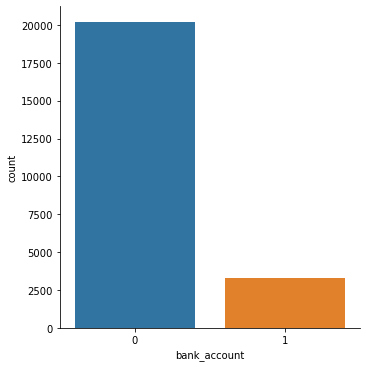

In [12]:
sns.catplot(x="bank_account", kind="count", data=bank_train)

## Convert Target label to numerical values

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
bank_train['bank_account'] = le.fit_transform(bank_train['bank_account'])

bank_train.bank_account.head()

0    1
1    0
2    1
3    0
4    0
Name: bank_account, dtype: int64

## Check for correlationship between features

In [14]:
bank_train.corr()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
country,1.000000,-0.094991,-0.161362,0.152285,-0.150003,-0.119158,-0.058778,-0.027055,0.130408,0.009282,-0.050706,0.381066
year,-0.094991,1.000000,0.112318,0.214621,-0.066505,-0.052264,-0.019330,0.000317,0.001801,-0.026187,0.173869,0.266323
bank_account,-0.161362,0.112318,1.000000,0.087288,0.209669,-0.028326,0.019429,0.117234,-0.070853,-0.038739,0.323768,-0.064171
location_type,0.152285,0.214621,0.087288,1.000000,-0.085238,-0.257284,-0.047373,0.012924,0.017042,0.080406,0.126128,0.368606
cellphone_access,-0.150003,-0.066505,0.209669,-0.085238,1.000000,0.091360,-0.103611,0.102370,-0.048705,-0.094195,0.252970,-0.146141
household_size,-0.119158,-0.052264,-0.028326,-0.257284,0.091360,1.000000,-0.129729,0.014576,0.104048,-0.127737,0.001613,-0.156835
age_of_respondent,-0.058778,-0.019330,0.019429,-0.047373,-0.103611,-0.129729,1.000000,0.012745,-0.151477,0.222908,-0.352970,-0.102770
gender_of_respondent,-0.027055,0.000317,0.117234,0.012924,0.102370,0.014576,0.012745,1.000000,-0.472048,-0.103238,0.119883,-0.029734
relationship_with_head,0.130408,0.001801,-0.070853,0.017042,-0.048705,0.104048,-0.151477,-0.472048,1.000000,-0.142229,-0.017141,0.041006
marital_status,0.009282,-0.026187,-0.038739,0.080406,-0.094195,-0.127737,0.222908,-0.103238,-0.142229,1.000000,-0.123628,0.056011


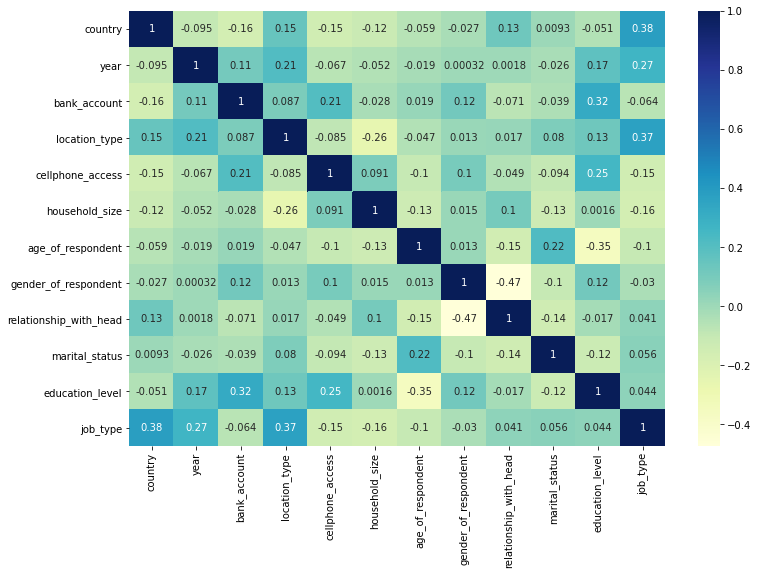

In [15]:
# plotting correlation heatmap
plt.figure(figsize=(12,8))
dataplot = sns.heatmap(bank_train.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

## Split features into independent variable and dependent variable 

In [17]:
x = bank_train.drop("bank_account", axis = 1) 
y = bank_train["bank_account"]

x.shape, y.shape 

((23524, 11), (23524,))

## Checking for data imbalance

0    20212
1     3312
Name: bank_account, dtype: int64

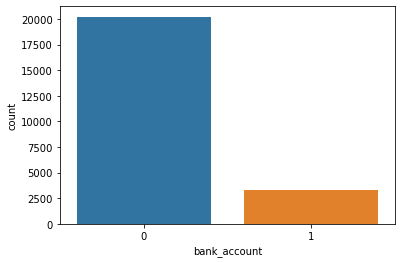

In [18]:
sns.countplot(x="bank_account", data=bank_train) 

bank_train["bank_account"].value_counts() 

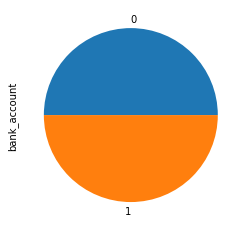

In [19]:
ros = RandomOverSampler(sampling_strategy="not majority")
x_res, y_res = ros.fit_resample(x, y)

ax = y_res.value_counts().plot.pie()

## Scale and transform dataset

In [20]:
Scaler = StandardScaler() 

x = Scaler.fit_transform(x_res) 
x  

array([[-1.11829393,  1.06792819, -0.87451574, ..., -0.37588694,
         0.46558673,  1.21289502],
       [-1.11829393,  1.06792819, -0.87451574, ...,  1.72895494,
        -1.82805723, -0.39381587],
       [-1.11829393,  1.06792819,  1.14348999, ...,  0.676534  ,
         1.9946827 ,  1.21289502],
       ...,
       [ 1.01536888, -0.08176765, -0.87451574, ..., -2.48072882,
         1.9946827 ,  0.89155284],
       [-0.05146253, -1.23146349, -0.87451574, ...,  0.676534  ,
         0.46558673,  1.21289502],
       [-1.11829393,  1.06792819, -0.87451574, ..., -0.37588694,
         1.23013471, -1.03650023]])

## Split data into train and test data

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x_res, y_res, test_size=0.2) 

x_train.shape, x_test.shape 

((32339, 11), (8085, 11))

## Logistic regression algorithmn

In [22]:
# Define the hyperparameters to be tuned
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a logistic regression model
lr = LogisticRegression(max_iter=1000)

# Perform grid search to find the best hyperparameters
grid = GridSearchCV(estimator=lr, param_grid=params, cv=5)
grid.fit(x_train,y_train)

# Print the best hyperparameters and their corresponding accuracy score
print("Best hyperparameters:", grid.best_params_)

Best hyperparameters: {'C': 0.1}


In [23]:
lr = LogisticRegression(C=1,max_iter=1000)
lr.fit(x_train,y_train)

LogisticRegression(C=0.1, max_iter=1000)

In [24]:
predict_lr = lr.predict(x_test) 
predict_lr 

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [25]:
accuracy_score_lr = accuracy_score(y_test,predict_lr) 
accuracy_score_lr

0.7345701917130488

## Random forest classifier algorithmn

In [27]:
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50],
    'max_depth': [5, 10, 15, 20, 25, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and their corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [28]:
rf = RandomForestClassifier(max_depth= 15, min_samples_leaf=1, min_samples_split = 2, n_estimators=50)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=50)

In [29]:
rf.score(x_test, y_test)

0.8771799628942486

In [ ]:
y_predicted = rf.predict(x_test)
y_predicted

## Support vector machine algorithmn

In [ ]:
param_grid = {'C': [0.1, 1, 10, 50],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'rbf']}

# Create a SVM classifier
sv = SVC()

# Create a grid search object with 10-fold cross-validation
grid_search = GridSearchCV(sv, param_grid, cv=2)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters: ", grid_search.best_params_)

In [42]:
sv = SVC()
sv.fit(x_train, y_train)

SVC()

In [43]:
sv.score(x_test, y_test)

0.4940012368583797

## Decision tree classifier algorithmn

In [30]:
dt = tree.DecisionTreeClassifier()

# Define the hyperparameter values to be searched
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# Create a grid search object
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [31]:
dt = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_leaf = 1, min_samples_split = 2)

In [32]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [33]:
dt.score(x_test, y_test)

0.7959183673469388

## Multinomial Naive Bayes classifier algorithmn

In [34]:
# Define Naive Bayes classifier object
nb_clf = MultinomialNB()

# Define hyperparameters to tune
parameters = {'alpha': [0.1, 1.0, 10.0],
              'fit_prior': [True, False]}

# Define grid search object with cross-validation
clf = GridSearchCV(nb_clf, parameters, cv=5)

# Fit grid search object to the training data
clf.fit(x_train, y_train)

# Print best hyperparameters
print("Best hyperparameters: ", clf.best_params_)

Best hyperparameters:  {'alpha': 10.0, 'fit_prior': True}


In [35]:
nb_clf = MultinomialNB(alpha= 10.0, fit_prior= True)

In [36]:
nb_clf.fit(x_train, y_train)

MultinomialNB(alpha=10.0)

In [37]:
nb_clf.score(x_test, y_test)

0.6949907235621521

## Gaussian Naive Bayes classifier algorithmn

In [38]:
# create a Gaussian Naive Bayes classifier object
gnb = GaussianNB()

# define the hyperparameter grid to search over
params = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}

# perform grid search to find the best hyperparameters
grid_search = GridSearchCV(gnb, param_grid=params, cv=5)
grid_search.fit(x_train, y_train)
    
# print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# use the best hyperparameters to fit the model on the entire dataset
best_gnb = grid_search.best_estimator_
best_gnb.fit(x_train, y_train)

Best hyperparameters:  {'var_smoothing': 0.0001}
Best score:  0.7201211679408679


GaussianNB(var_smoothing=0.0001)

In [39]:
gnb = GaussianNB(var_smoothing = 0.0001)

In [40]:
gnb.fit(x_train, y_train)

GaussianNB(var_smoothing=0.0001)

In [41]:
gnb.score(x_test, y_test)

0.7089672232529375

### Best model

In [44]:
best = rf

## Save model as a file

In [45]:
filename = "bank.joblib"
joblib.dump(best, filename)

['bank.joblib']